# Generating random numbers

In [2]:
# Ex1. Simulate geometric distribution with probability parameter p

import numpy as np

random_variates =  np.random.rand(10000)

def get_geometric(p, random_variates):
    return np.floor(np.log(random_variates)/np.log(1-p)) + 1

geometrics = get_geometric(p = 0.10, random_variates=random_variates)

print(geometrics)

[ 4. 17.  4. ... 10.  4.  1.]


In [3]:
# Ex2 Simulate 6 point distribution

def direct_crude(summed_dist):
    random_variate = np.random.rand()
    return np.searchsorted(summed_dist, random_variate) + 1

def simple_rejection(distribution):
    max_val = max(distribution)
    while True:
        I_ = int(np.floor(np.random.rand() * len(distribution)) + 1)
        # x = np.random.randint(0, len(distribution))
        U_2 = np.random.rand() * max_val
        if U_2 < distribution[I_ - 1]:
            return I_

def make_aliasing(distribution):
    k = len(distribution)
    L = list(range(1, k+1)) # Aliases
    
    F = [k * i for i in distribution]

    # for i, p in enumerate(sorted(distribution)):
    bars_above = [i for i, p in enumerate(F) if p >= 1] # G
    bars_below = [i for i, p in enumerate(F) if p < 1] # S

    while not len(bars_below) == 0:
        j = bars_below.pop(0)
        
        # i = bars_above.pop(0)
        i = bars_above[0]
        
        
        L[j] = i    
        F[i] += F[i] - (1 - F[j])

        if F[i] < distribution[i]:
            bars_below.append(i)
            bars_above.pop(0)

            # Since we pop the first element need to append at the end
            # bars_above.append(i)
            
    return L, F

def alias_gen(L, F):
    n = len(L)
    i = int(np.floor(np.random.rand() * n)) # Shitty method, but corresponds to what is in slides
    U_1 = np.random.rand()
    if U_1 < F[i]:
        return i + 1
    else:
        return L[i] + 1

def rejection(distribution):
    while True:
        i = np.random.randint(0, len(distribution))
        U_2 = np.random.rand() * max(distribution)
        if U_2 < distribution[i]:
            return i

dist = [7/48, 5/48, 1/8, 1/16, 1/4, 5/16]

crudes = [direct_crude(np.cumsum(dist)) for _ in range(10000)]

rejecteds = [simple_rejection(dist) for _ in range(10000)]

aliased = [alias_gen(*make_aliasing(dist)) for _ in range(10000)]



Crude:  [6, 6, 5, 3, 1, 2, 5, 6, 6, 6, 2, 2, 5, 6, 6, 1, 5, 2, 5, 5, 5, 2, 6, 5, 6, 5, 4, 6, 1, 5, 6, 6, 5, 2, 4, 5, 3, 1, 5, 6, 5, 3, 5, 6, 5, 5, 1, 3, 6, 6, 6, 6, 3, 5, 1, 5, 5, 1, 6, 5, 6, 5, 1, 3, 3, 6, 5, 5, 3, 5, 6, 4, 3, 6, 6, 5, 1, 4, 6, 5, 6, 6, 2, 5, 5, 6, 5, 1, 6, 3, 6, 4, 5, 2, 1, 4, 6, 4, 3, 5, 5, 5, 2, 6, 1, 6, 6, 5, 6, 4, 1, 6, 5, 6, 2, 6, 5, 2, 1, 5, 5, 5, 6, 6, 5, 6, 5, 2, 3, 5, 1, 6, 6, 3, 5, 1, 2, 6, 2, 6, 6, 6, 5, 5, 4, 6, 2, 4, 2, 2, 5, 6, 6, 6, 1, 5, 6, 2, 6, 5, 5, 5, 5, 1, 6, 1, 5, 6, 2, 6, 6, 5, 3, 3, 2, 6, 6, 1, 5, 6, 5, 5, 2, 6, 6, 5, 1, 6, 6, 2, 6, 5, 6, 3, 6, 2, 6, 6, 6, 5, 1, 4, 6, 4, 6, 5, 5, 6, 1, 3, 1, 1, 1, 3, 6, 6, 2, 2, 3, 6, 6, 5, 1, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 1, 5, 2, 6, 6, 1, 6, 6, 3, 6, 6, 6, 5, 6, 1, 6, 1, 1, 6, 6, 5, 5, 5, 1, 1, 3, 3, 6, 5, 6, 3, 1, 6, 3, 6, 1, 3, 6, 3, 1, 6, 5, 2, 6, 1, 1, 5, 6, 5, 1, 4, 1, 6, 2, 4, 6, 6, 2, 3, 5, 2, 3, 5, 5, 6, 5, 6, 6, 1, 5, 2, 2, 3, 1, 5, 6, 1, 6, 2, 1, 5, 6, 6, 6, 2, 3, 6, 5, 1, 2, 5, 5, 3, 5, 6, 6, 2, 6

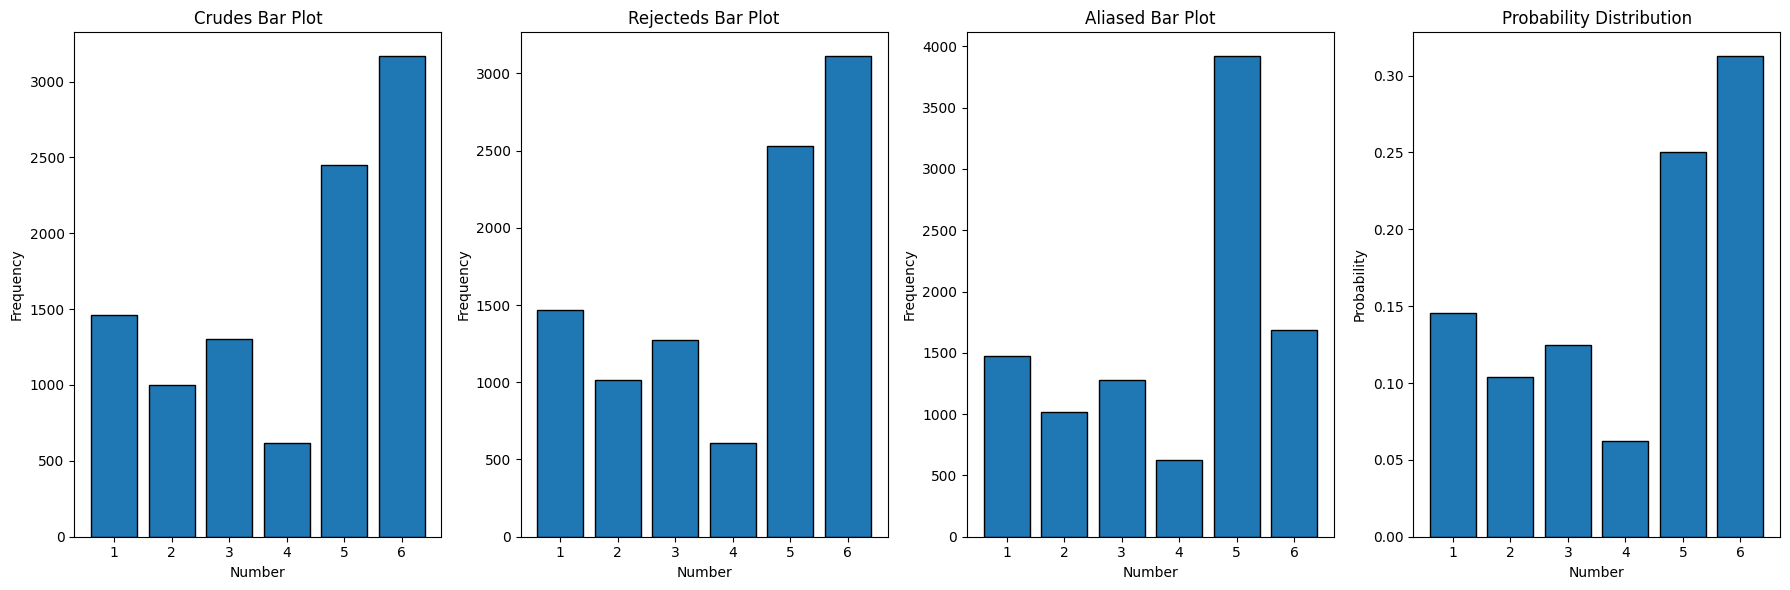

In [4]:
import matplotlib.pyplot as plt

print("Crude: ", crudes)
print("Rejected: ", rejecteds)
print("Aliased: ", aliased)

# Function to count occurrences
def count_occurrences(data, num_bins):
    counts = [0] * num_bins
    for number in data:
        counts[number - 1] += 1
    return counts

# Number of bins (numbers 1 to 6)
num_bins = 6

# Count occurrences for each list
crudes_counts = count_occurrences(crudes, num_bins)
rejecteds_counts = count_occurrences(rejecteds, num_bins)
aliased_counts = count_occurrences(aliased, num_bins)

# Plotting bar plots
plt.figure(figsize=(18, 6))

# Crudes bar plot
plt.subplot(1, 4, 1)
plt.bar(np.arange(1, 7), crudes_counts, edgecolor='black')
plt.xticks(np.arange(1, 7))
plt.title('Crudes Bar Plot')
plt.xlabel('Number')
plt.ylabel('Frequency')

# Rejecteds bar plot
plt.subplot(1, 4, 2)
plt.bar(np.arange(1, 7), rejecteds_counts, edgecolor='black')
plt.xticks(np.arange(1, 7))
plt.title('Rejecteds Bar Plot')
plt.xlabel('Number')
plt.ylabel('Frequency')

# Aliased bar plot
plt.subplot(1, 4, 3)
plt.bar(np.arange(1, 7), aliased_counts, edgecolor='black')
plt.xticks(np.arange(1, 7))
plt.title('Aliased Bar Plot')
plt.xlabel('Number')
plt.ylabel('Frequency')

# Probability distribution bar plot
plt.subplot(1, 4, 4)
plt.bar(np.arange(1, 7), dist, edgecolor='black')
plt.xticks(np.arange(1, 7))
plt.title('Probability Distribution')
plt.xlabel('Number')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()


In [5]:
# Part two, generating from continuous distributions

# . Generate simulated values from the following distributions
# (a) Exponential distribution
# (b) Normal distribution (at least with standard Box-Mueller)
# (c) Pareto distribution, with β = 1 and experiment with
# different values of k values: k = 2.05, k = 2.5, k = 3 and
# k = 4.
# Verify the results by comparing histograms with analytical
# results and perform tests for distribution type.
# 2. For the Pareto distribution with support on [β, ∞[ compare
# mean value and variance, with analytical results, which can be
# calculated as E(X) = β k
# k−1 (for k > 1) and
# Var(X) = β2 k
# (k−1)2(k−2) (for k > 2). Explain problems if any.
# 3. For the normal distribution generate 100 95% confidence
# intervals for the mean and variance, each based on 10
# observations. Discuss the results.
# 4. Simulate from the Pareto distribution using composition

In [8]:
# Generate from expoential,norma and pareto distribution

exponential_sample = lambda u, lamb: -np.log(u)/lamb
normal_sample = lambda u, mean, sqrt: mean + sqrt * np.sqrt(-2 * np.log(u)) * np.cos(2 * np.pi * u)

# The smarter way of doing normal distribution samples
# return mean + sqrt * np.sqrt(-2 * np.log(u)) * np.cos(2 * np.pi * u)


def exponential_sample(lamb):
    u = np.random.rand()
    return -np.log(u)/lamb

def normal_sample(mean=0, sqrt=1):
    R = np.sqrt(exponential_sample(1/2))
    u = np.random.rand()

    # u = np.random.uniform(0, 2*np.pi)

    Z1 = mean + sqrt * (R * np.cos(2*np.pi*u))
    Z2 = mean + sqrt * (R * np.sin(2*np.pi*u))
    return Z1, Z2  

def pareto_sample(k, beta=1):
    u = np.random.rand()
    return beta / (u ** (1/k)) # Beta times U to the power of -1/k

def sine_cosine_generation():
    u1 = np.random.rand()
    u2 = np.random.rand()

    R = np.sqrt(u1**2 + u2**2)

    random_cos = u1/R
    random_sin = u2/R

    return random_cos, random_sin, u1, u2



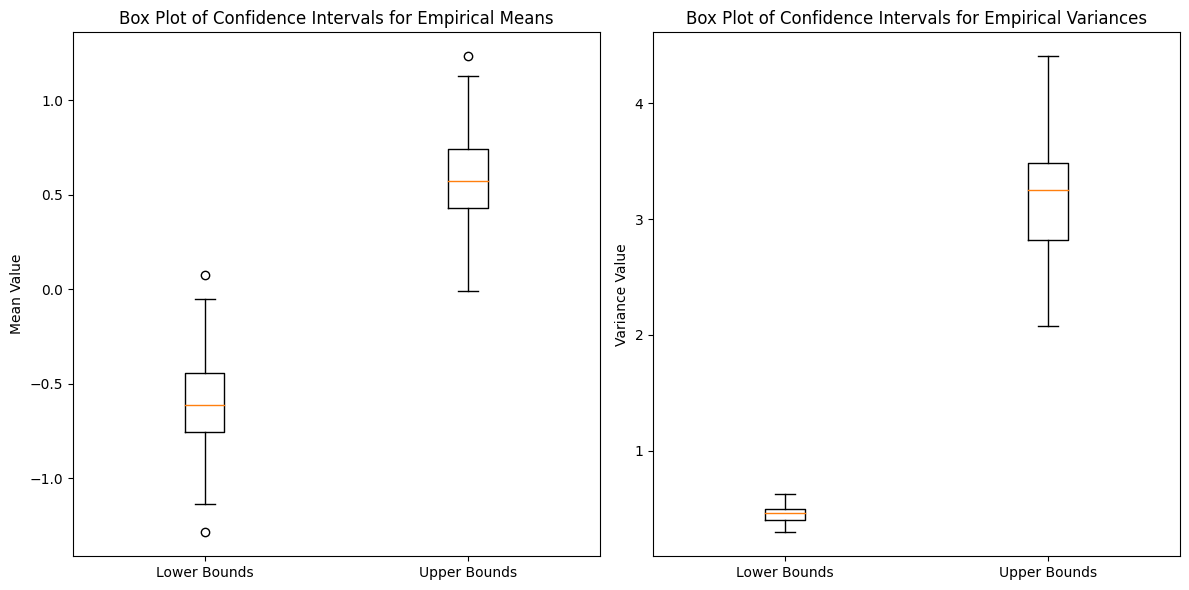

In [30]:
import scipy.stats as stats

means = []
variances = []

mean_conf_intervals = []
variance_conf_intervals = []

for i in range(100):
    normal_samples = [normal_sample(0, 1) for _ in range(10)]

    mean = np.mean(normal_samples)
    variance = np.std(normal_samples)

    # Remembered variance confidence interval as taken from https://online.stat.psu.edu/stat415/book/export/html/810
    mean_conf_interval = [mean  - 1.96 * variance / np.sqrt(10), mean + 1.96 * variance / np.sqrt(10)]
    variance_conf_interval = [(9*variance)/stats.chi2.ppf(0.975, 9), (9*variance)/stats.chi2.ppf(0.025, 9)]

    mean_conf_intervals.append(mean_conf_interval)
    variance_conf_intervals.append(variance_conf_interval)


# Extracting the lower and upper bounds for plotting
mean_lowers, mean_uppers = zip(*mean_conf_intervals)
var_lowers, var_uppers = zip(*variance_conf_intervals)

# Creating the box plots
plt.figure(figsize=(12, 6))

# Box plot for mean confidence intervals
plt.subplot(1, 2, 1)
plt.boxplot([mean_lowers, mean_uppers], labels=['Lower Bounds', 'Upper Bounds'])
plt.title('Box Plot of Confidence Intervals for Empirical Means')
plt.ylabel('Mean Value')

# Box plot for variance confidence intervals
plt.subplot(1, 2, 2)
plt.boxplot([var_lowers, var_uppers], labels=['Lower Bounds', 'Upper Bounds'])
plt.title('Box Plot of Confidence Intervals for Empirical Variances')
plt.ylabel('Variance Value')

plt.tight_layout()
plt.show()